In [31]:
library(readr)
library(ggplot2)
library(forecast)
library(fpp2)
library(TTR)
library(dplyr)

In [32]:
dat <- read_csv("Departure.csv")
glimpse(dat)

Rows: 153 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
dbl (1): departures '000

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 153
Columns: 2
$ Month             <chr> "2010 January", "2010 February", "2010 March", "2010…
$ `departures '000` <dbl> 732.4, 757.2, 919.6, 709.5, 977.9, 1183.1, 1269.5, 1…


In [33]:
sum(is.na(dat))

[1] 0

In [34]:
colnames(dat)[2]='departure'

In [35]:
#dprt_dub$year <- substr(dprt_dub$Month,1,4)
dat$Date <- trimws(paste(substr(dat$Month,1,4),ifelse(
nchar(match(substr(dat$Month,6,15), month.name))<2,
paste('0',match(substr(dat$Month,6,15), month.name),sep=''),
match(substr(dat$Month,6,15), month.name)
)
,sep=""))

In [36]:
##represent the data in (1000's)
#dat$departure = dat$departure/1000

In [37]:
dat$Date<-as.Date(paste0(dat$Date, '01'), format='%Y%m%d')

In [38]:
dat <- dat[,!names(dat) %in% c("Month")]

In [39]:
dat

departure,Date
<dbl>,<date>
732.4,2010-01-01
757.2,2010-02-01
919.6,2010-03-01
709.5,2010-04-01
977.9,2010-05-01
1183.1,2010-06-01
1269.5,2010-07-01
1250.5,2010-08-01
1078.7,2010-09-01


In [40]:
dat_ts <- ts(dat[, 1], start = c(2010, 1), end = c(2022, 12), frequency = 12)
 
#lines 2 to 4
mape <- function(actual,pred){
  mape <- mean(abs((actual - pred)/actual))*100
  return (mape)
}

In [41]:
dat_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


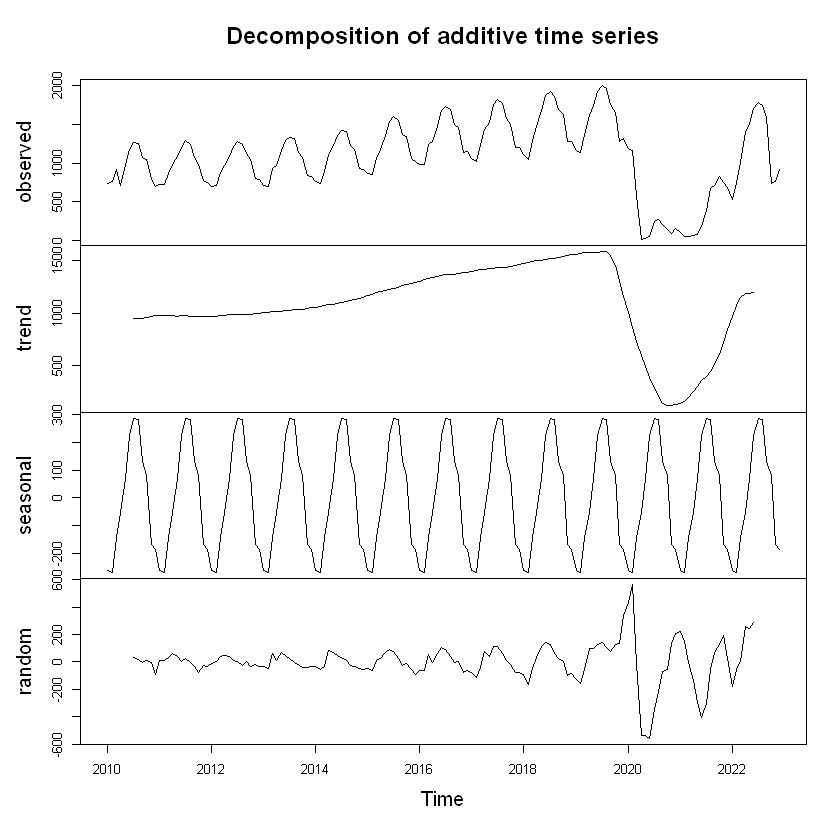

In [42]:
components_dfts <- decompose(dat_ts)
plot(components_dfts)

In [43]:
DepLinMod <- lm(dat_ts~time(dat_ts))

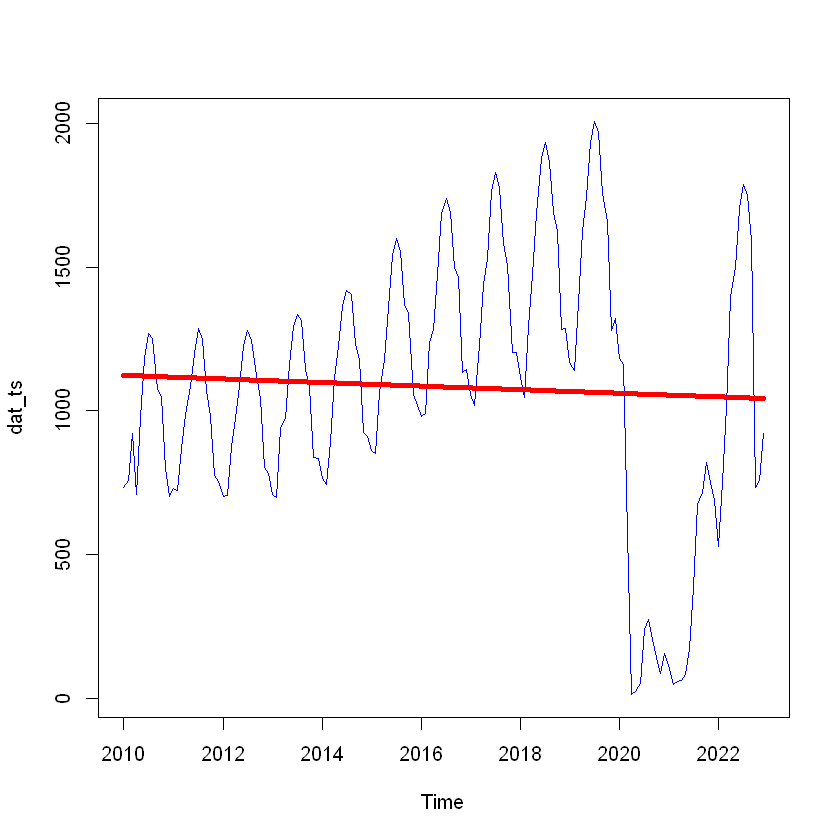

In [44]:
plot(dat_ts, col='blue')
x <- as.vector(time(dat_ts))
y <- predict.lm(DepLinMod)
lines(x, y, col='red', lw=4)

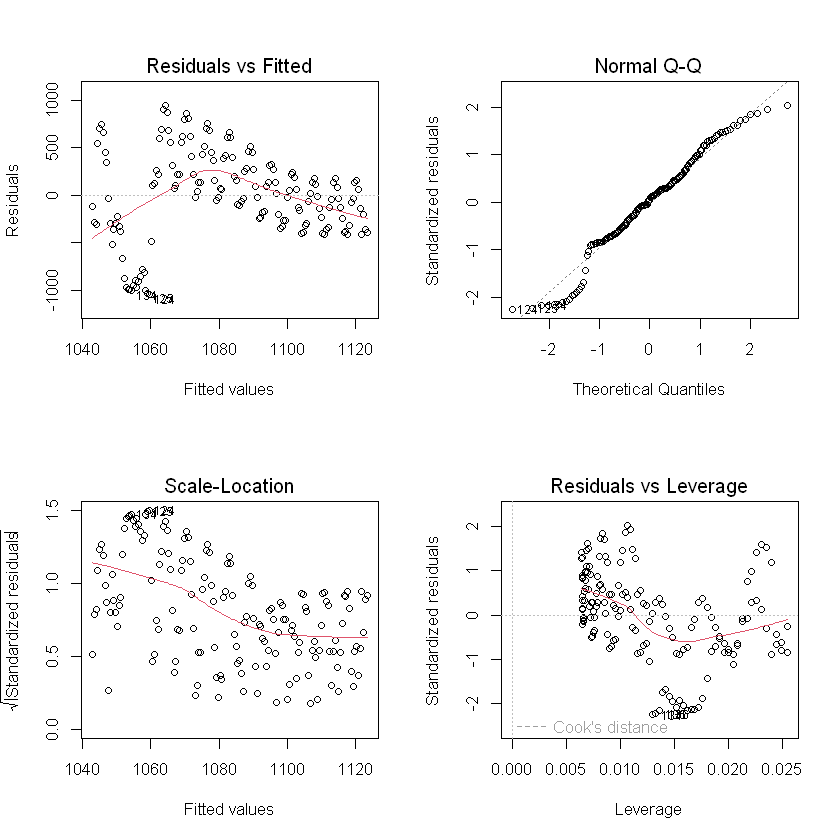

In [45]:
par(mfrow=c(2,2))
plot(DepLinMod)

In [46]:
lg_Dpt <- log(dat_ts)

In [47]:
DptLogMod <- lm(lg_Dpt~time(dat_ts))

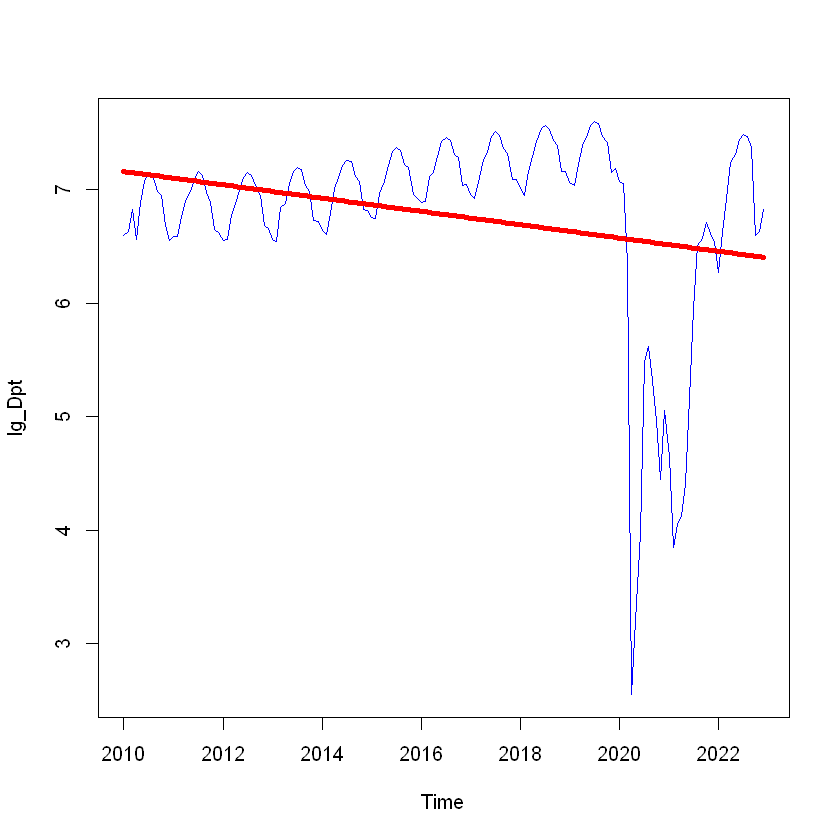

In [48]:
plot(lg_Dpt, col='blue')
x <- as.vector(time(dat_ts))
y <- predict.lm(DptLogMod)
lines(x, y, col='red', lw=4)

tibble [153 × 2] (S3: tbl_df/tbl/data.frame)
 $ departure: num [1:153] 732 757 920 710 978 ...
 $ Date     : Date[1:153], format: "2010-01-01" "2010-02-01" ...


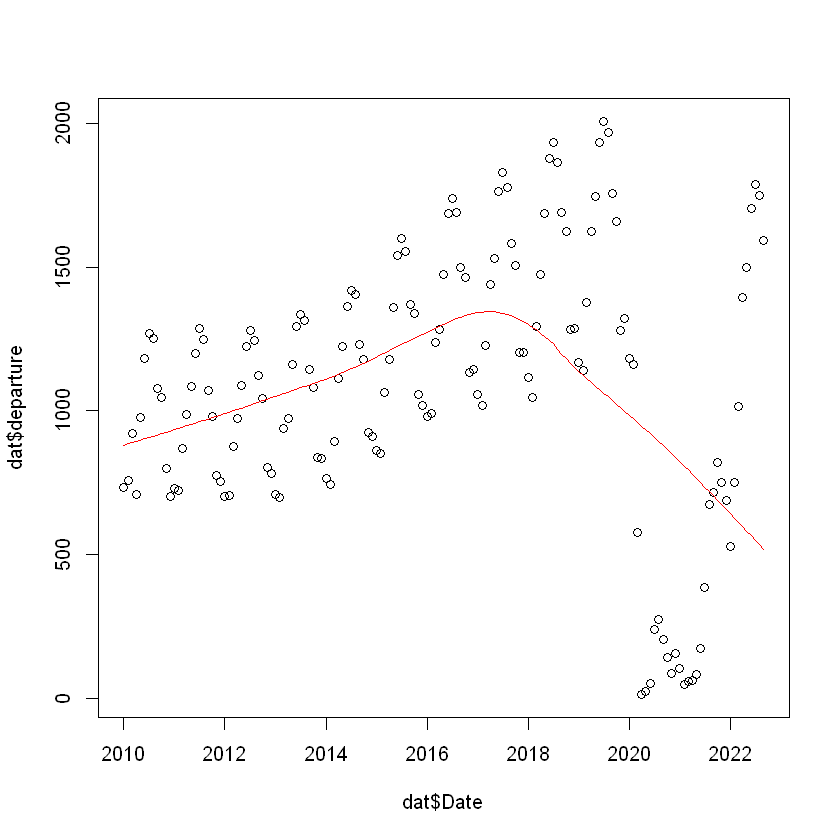

In [53]:
str(dat)
plot(dat$Date, dat$departure)
lines(lowess(dat$Date, dat$departure), col='red')


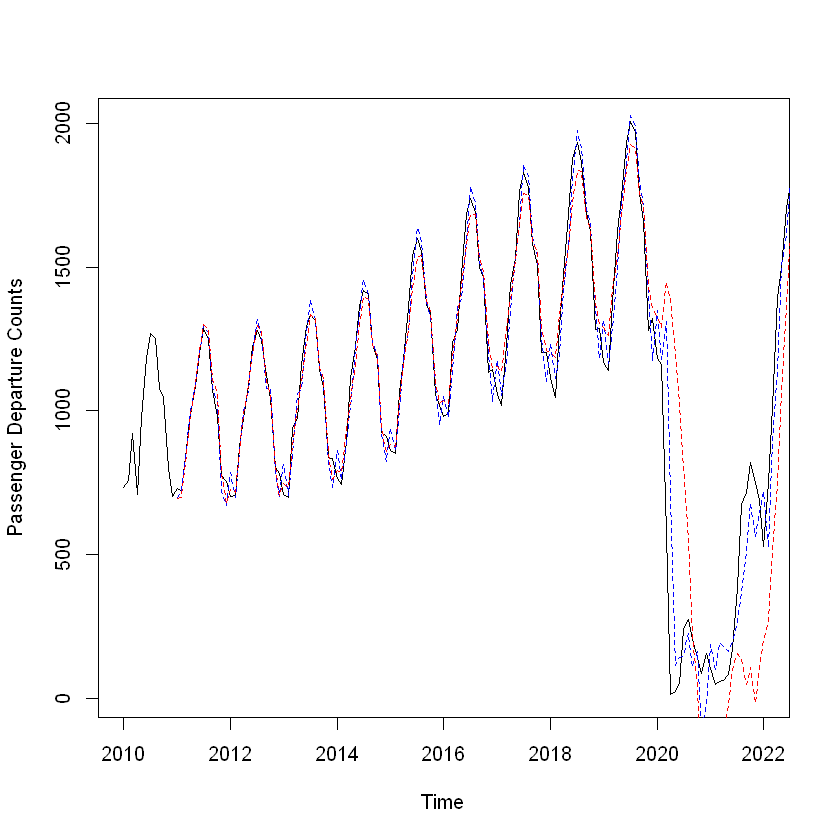

In [54]:
HW1 <- HoltWinters(dat_ts)
# Custom HoltWinters fitting
HW2 <- HoltWinters(dat_ts, alpha=0.2, beta=0.1, gamma=0.1)
#Visually evaluate the fits
plot(dat_ts, ylab="Passenger Departure Counts", xlim=c(2010,2022))
lines(HW1$fitted[,1], lty=2, col="blue")
lines(HW2$fitted[,1], lty=2, col="red")

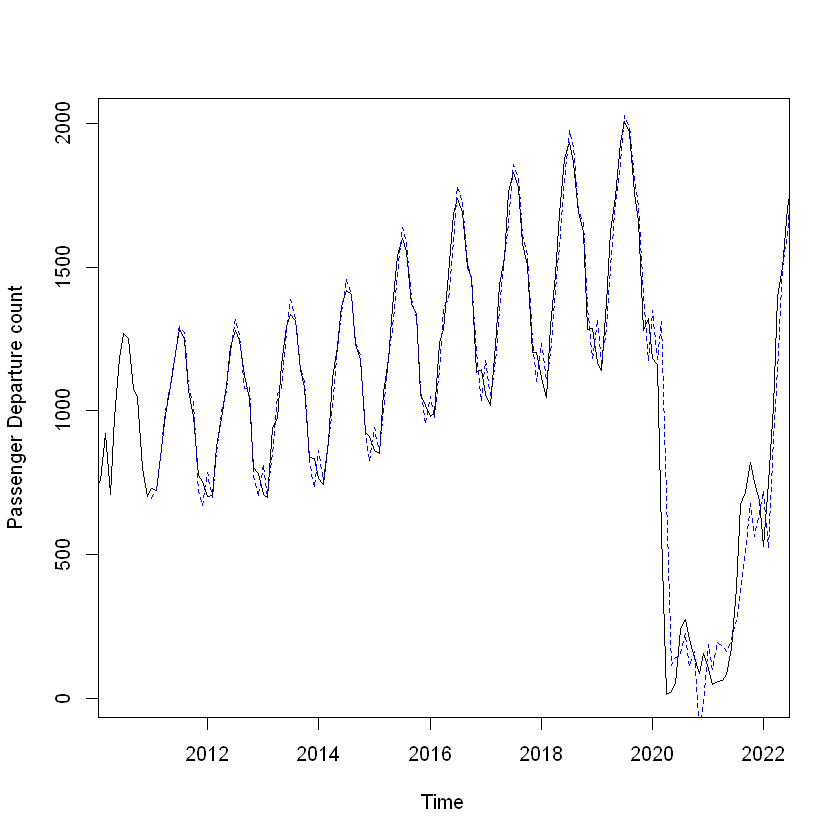

In [55]:
HW1.pred <- predict(HW1, 24, prediction.interval = TRUE, level=0.95)
#Visually evaluate the prediction
plot(dat_ts, ylab="Passenger Departure count", xlim=c(2010.5,2022))
lines(HW1$fitted[,1], lty=2, col="blue")
lines(HW1.pred[,1], col="red")
lines(HW1.pred[,2], lty=2, col="orange")
lines(HW1.pred[,3], lty=2, col="orange")

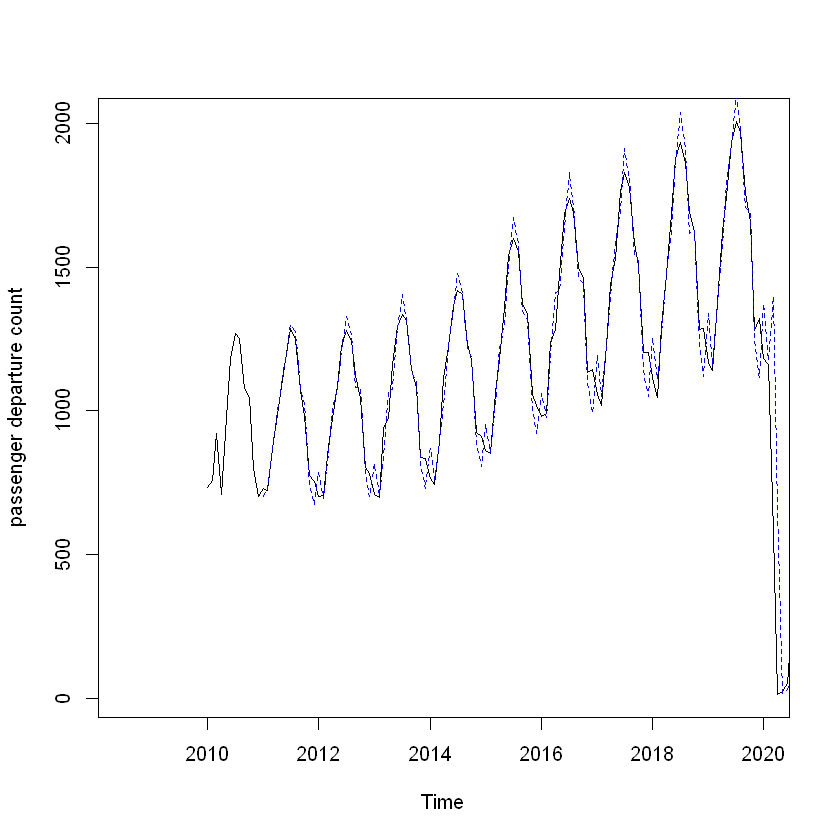

In [56]:
HW3 <- HoltWinters(dat_ts, seasonal = "multiplicative")
HW3.pred <- predict(HW3, 24, prediction.interval = TRUE, level=0.95)
plot(dat_ts, ylab="passenger departure count", xlim=c(2008.5,2020))
lines(HW3$fitted[,1], lty=2, col="blue")
lines(HW3.pred[,1], col="red")
lines(HW3.pred[,2], lty=2, col="orange")
lines(HW3.pred[,3], lty=2, col="orange")

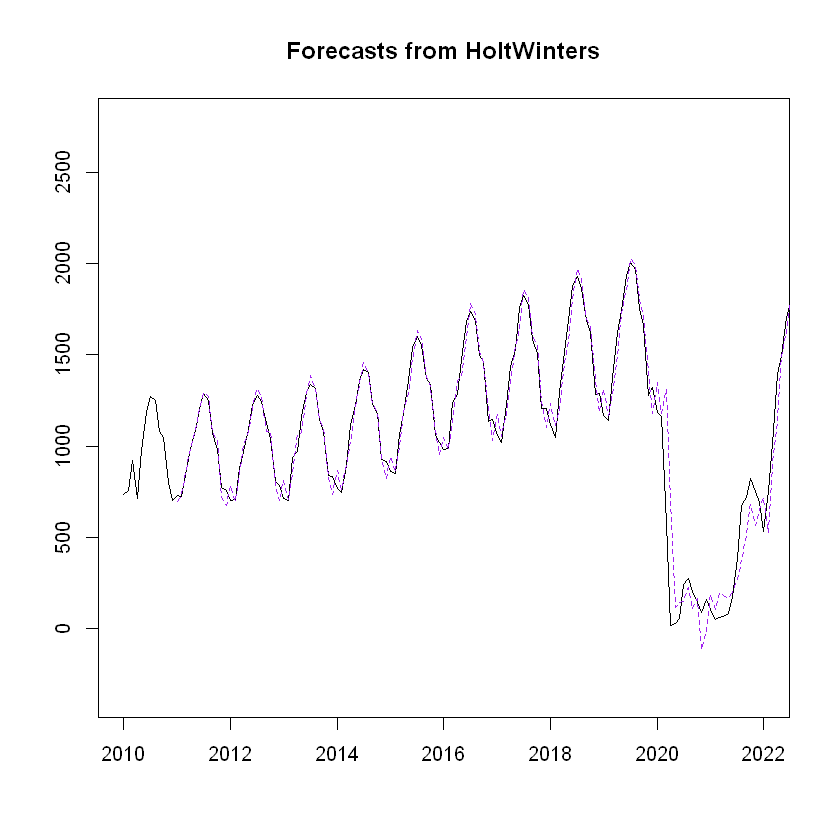

In [57]:
library(forecast)
HW1_for <- forecast(HW1, h=24, level=c(80,95))
#visualize our predictions:
plot(HW1_for, xlim=c(2010, 2022))
lines(HW1_for$fitted, lty=2, col="purple")


	Box-Ljung test

data:  HW1_for$residuals
X-squared = 18.313, df = 20, p-value = 0.5668


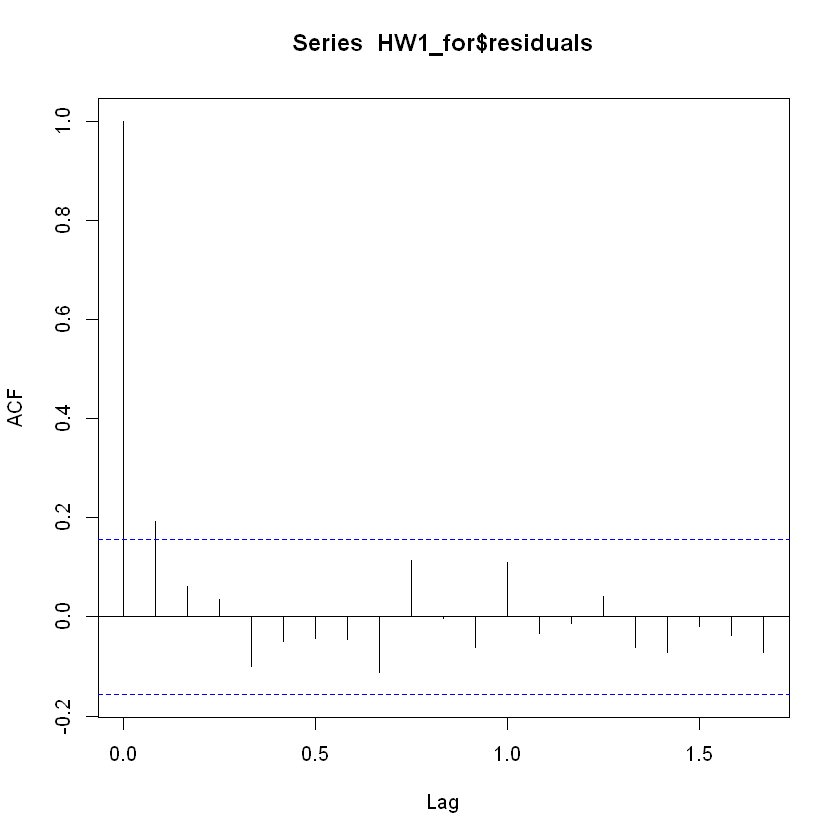

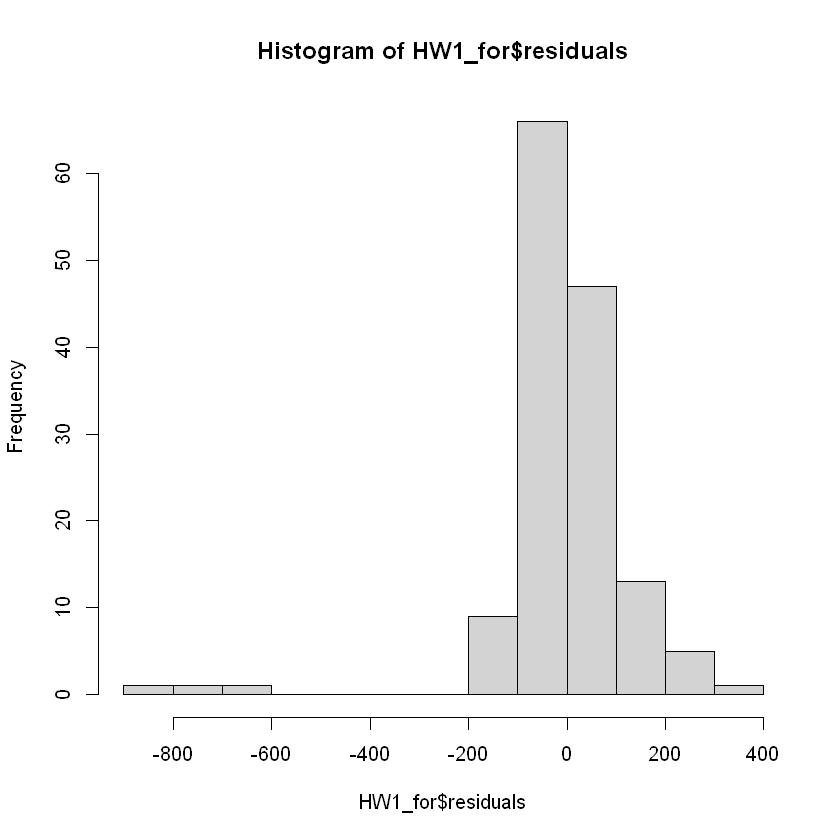

In [58]:
acf(HW1_for$residuals, lag.max=20, na.action=na.pass)
Box.test(HW1_for$residuals, lag=20, type="Ljung-Box")
hist(HW1_for$residuals)

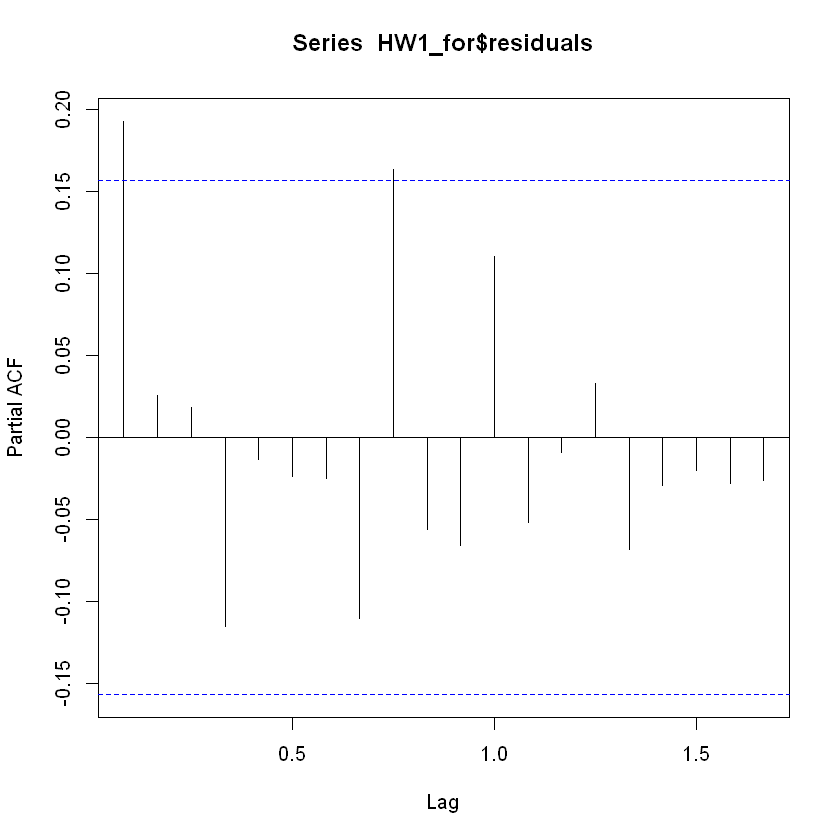

In [59]:
pacf(HW1_for$residuals, lag.max=20, na.action=na.pass)


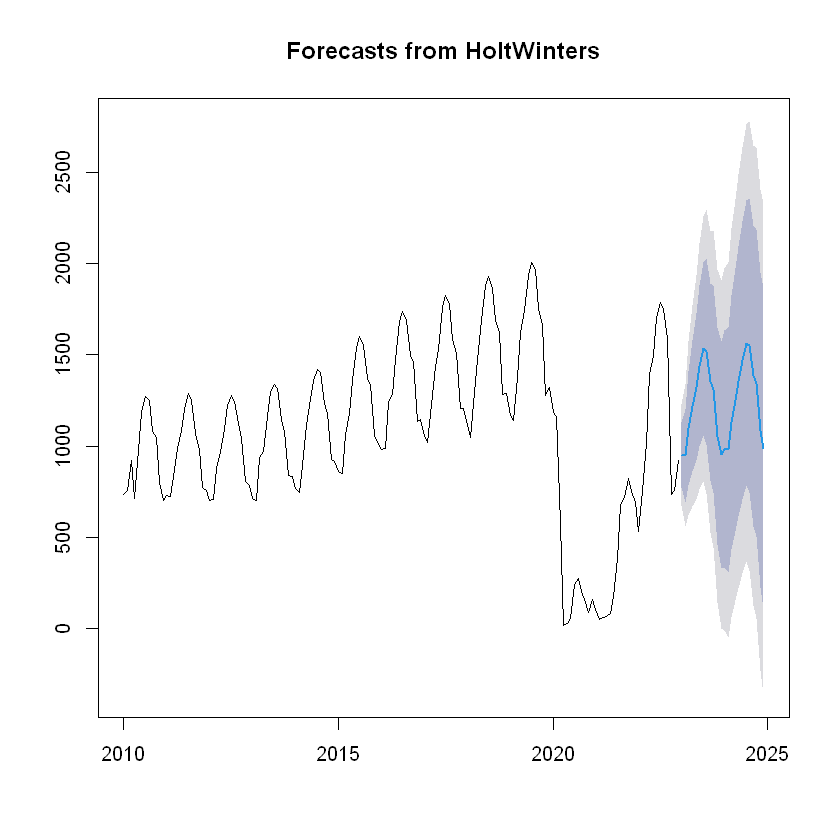

In [89]:
plot(HW1_for)

In [95]:
HW3

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = dat_ts, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 1
 beta : 0
 gamma: 0.08434583

Coefficients:
            [,1]
a   1299.6957346
b      2.6934441
s1     0.7358799
s2     0.7297410
s3     0.8769095
s4     0.9994145
s5     1.1012321
s6     1.2158999
s7     1.3168257
s8     1.2991644
s9     1.1247809
s10    1.0796264
s11    0.8129754
s12    0.7075502

In [60]:
library('ggplot2')
library('forecast')
library('tseries')

Warning message:
"package 'tseries' was built under R version 4.2.2"


In [61]:
adf.test(dat_ts)


	Augmented Dickey-Fuller Test

data:  dat_ts
Dickey-Fuller = -2.3689, Lag order = 5, p-value = 0.4226
alternative hypothesis: stationary


In [62]:
dpt_model = auto.arima(dat_ts,ic="aic",trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 2067.354
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 1735.381
 ARIMA(0,0,1)(0,1,1)[12] with drift         : 1886.103
 ARIMA(0,0,0)(0,1,0)[12]                    : 2065.58
 ARIMA(1,0,0)(0,1,0)[12] with drift         : 1740.671
 ARIMA(1,0,0)(2,1,0)[12] with drift         : 1712.781
 ARIMA(1,0,0)(2,1,1)[12] with drift         : Inf
 ARIMA(1,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 2047.365
 ARIMA(2,0,0)(2,1,0)[12] with drift         : 1702.684
 ARIMA(2,0,0)(1,1,0)[12] with drift         : 1707.116
 ARIMA(2,0,0)(2,1,1)[12] with drift         : Inf
 ARIMA(2,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(3,0,0)(2,1,0)[12] with drift         : 1704.392
 ARIMA(2,0,1)(2,1,0)[12] with drift         : 1711.631
 ARIMA(1,0,1)(2,1,0)[12] with drift         : 1704.678
 ARIMA(3,0,1)(2,1,0)[12] with 

In [63]:
dpt_model

Series: dat_ts 
ARIMA(2,0,0)(2,1,0)[12] 

Coefficients:
         ar1      ar2     sar1     sar2
      1.2607  -0.3219  -0.6186  -0.4416
s.e.  0.0831   0.0831   0.1046   0.1052

sigma^2 = 18924:  log likelihood = -916.3
AIC=1842.6   AICc=1843.03   BIC=1857.45

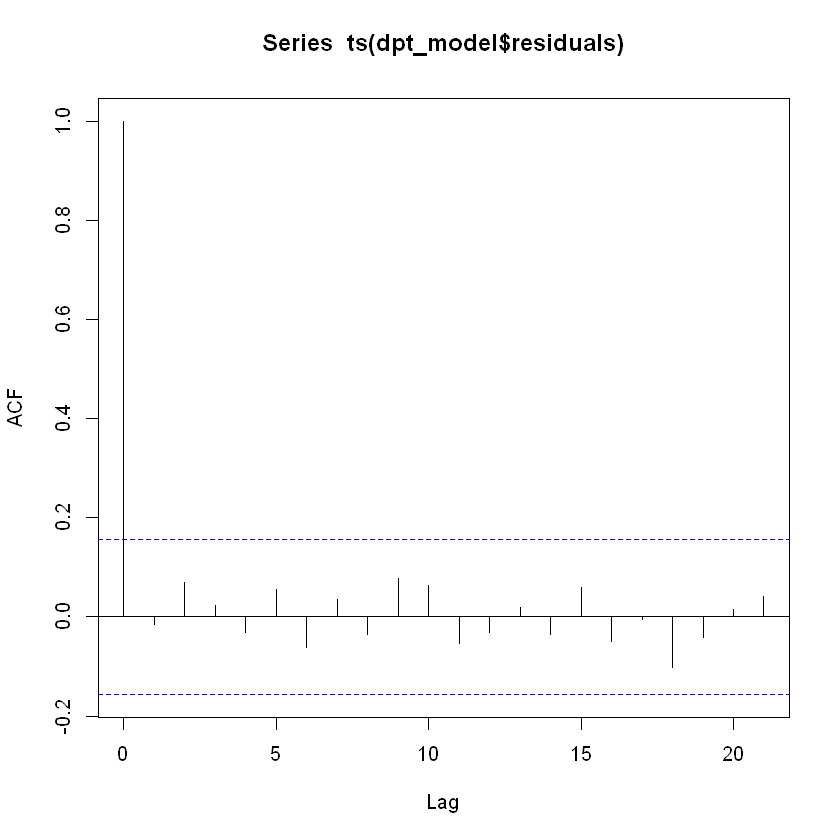

In [64]:
acf(ts(dpt_model$residuals))

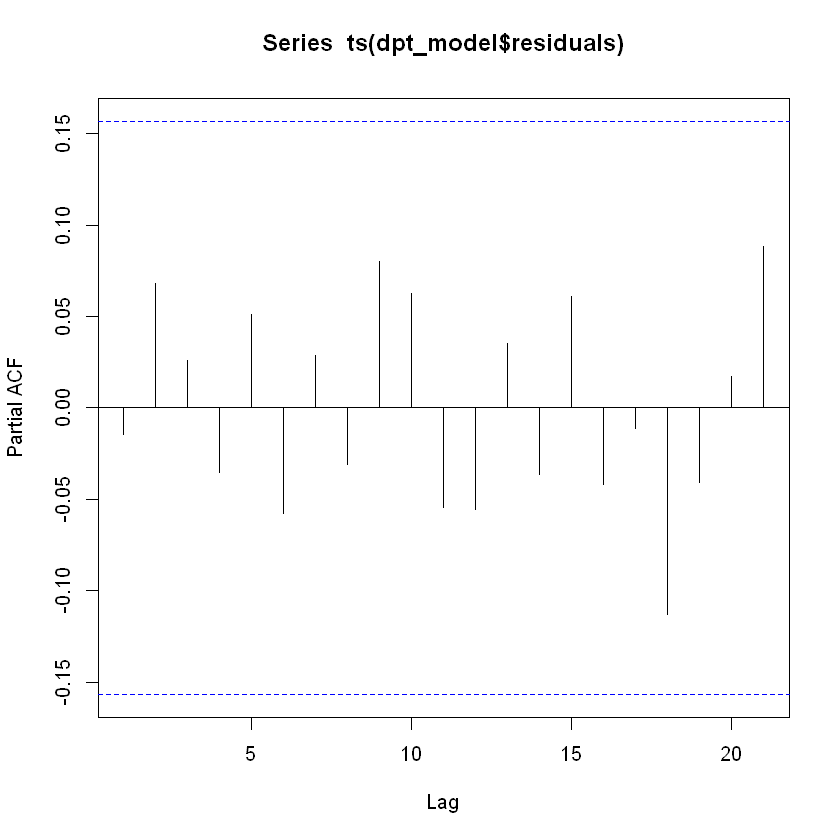

In [65]:
pacf(ts(dpt_model$residuals))

In [66]:
dprt_cnt_fcast=forecast(dpt_model,level=c(96),h=10*4)

In [67]:
dprt_cnt_fcast

         Point Forecast       Lo 96    Hi 96
Jan 2023       836.3163  553.792961 1118.840
Feb 2023       911.2984  456.668590 1365.928
Mar 2023       751.2908  172.549834 1330.032
Apr 2023       641.4212  -28.216157 1311.059
May 2023       682.0680  -55.601878 1419.738
Jun 2023       781.3505   -8.269873 1570.971
Jul 2023       925.3994   95.461089 1755.338
Aug 2023       971.3668  109.746632 1832.987
Sep 2023       881.2716   -5.479117 1768.022
Oct 2023       540.0137 -366.812869 1446.840
Nov 2023       506.0250 -416.925849 1428.976
Dec 2023       583.9274 -352.027537 1519.882
Jan 2024       496.9366 -471.443246 1465.317
Feb 2024       536.1096 -467.411440 1539.631
Mar 2024       523.0705 -511.582124 1557.723
Apr 2024       547.2837 -513.246554 1607.814
May 2024       587.7222 -493.885152 1669.329
Jun 2024       700.1709 -398.510823 1798.853
Jul 2024       860.2215 -252.288073 1972.731
Aug 2024       996.5255 -127.197257 2120.248
Sep 2024       951.7344 -181.095990 2084.565
Oct 2024  

In [68]:
naive_mod <- naive(dat_ts, h = 12)
summary(naive_mod)


Forecast method: Naive method

Model Information:
Call: naive(y = dat_ts, h = 12) 

Residual sd: 173.0108 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 1.207742 173.0108 126.6503 -28.79857 43.90249 0.4668085 0.3979402

Forecasts:
         Point Forecast    Lo 80    Hi 80      Lo 95    Hi 95
Jan 2023          919.6 697.8777 1141.322  580.50507 1258.695
Feb 2023          919.6 606.0374 1233.163  440.04735 1399.153
Mar 2023          919.6 535.5658 1303.634  332.27035 1506.930
Apr 2023          919.6 476.1555 1363.045  241.41014 1597.790
May 2023          919.6 423.8140 1415.386  161.36068 1677.839
Jun 2023          919.6 376.4936 1462.706   88.99044 1750.210
Jul 2023          919.6 332.9780 1506.222   22.43914 1816.761
Aug 2023          919.6 292.4748 1546.725  -39.50530 1878.705
Sep 2023          919.6 254.4332 1584.767  -97.68480 1936.885
Oct 2023          919.6 218.4527 1620.747 -152.71233 1991.912
Nov 2023          919.6

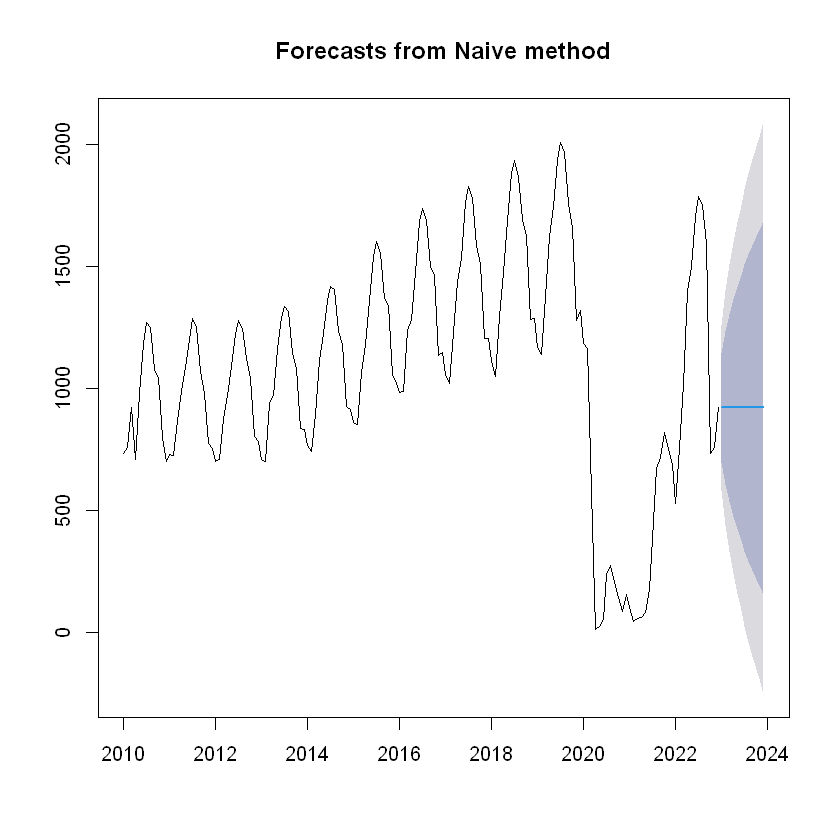

In [74]:
plot(naive_mod)

In [69]:
dat$naive = 919.6 
mape(dat$departure,dat$naive)

[1] 170.372

In [70]:
#Simple Exponential Smoothing
se_model <- ses(dat_ts, h = 12)
summary(se_model)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = dat_ts, h = 12) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 762.1407 

  sigma:  173.5951

     AIC     AICc      BIC 
2400.663 2400.821 2409.812 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set 1.009351 172.4787 126.0354 -28.64455 43.64916 0.464542 0.3977867

Forecasts:
         Point Forecast    Lo 80    Hi 80      Lo 95    Hi 95
Jan 2023       919.5838 697.1127 1142.055  579.34368 1259.824
Feb 2023       919.5838 604.9779 1234.190  438.43569 1400.732
Mar 2023       919.5838 534.2783 1304.889  330.30996 1508.858
Apr 2023       919.5838 474.6751 1364.492  239.15467 1600.013
May 2023       919.5838 422.1632 1417.004  158.84471 1680.323
Jun 2023       919.5838 374.6887 1464.479   86.23867 1752.929
Jul 2023       919.5838 331.0312 1508.136   19.47033 1819.697
Aug 2023       919.5838 290.39

In [78]:
df_fc = as.data.frame(se_model)
#colnames(df_fc)[1]  <- "PointForecast"
#df_fc

In [79]:
mape(dat$departure, df_fc$`Point Forecast`) 

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


[1] 170.3697

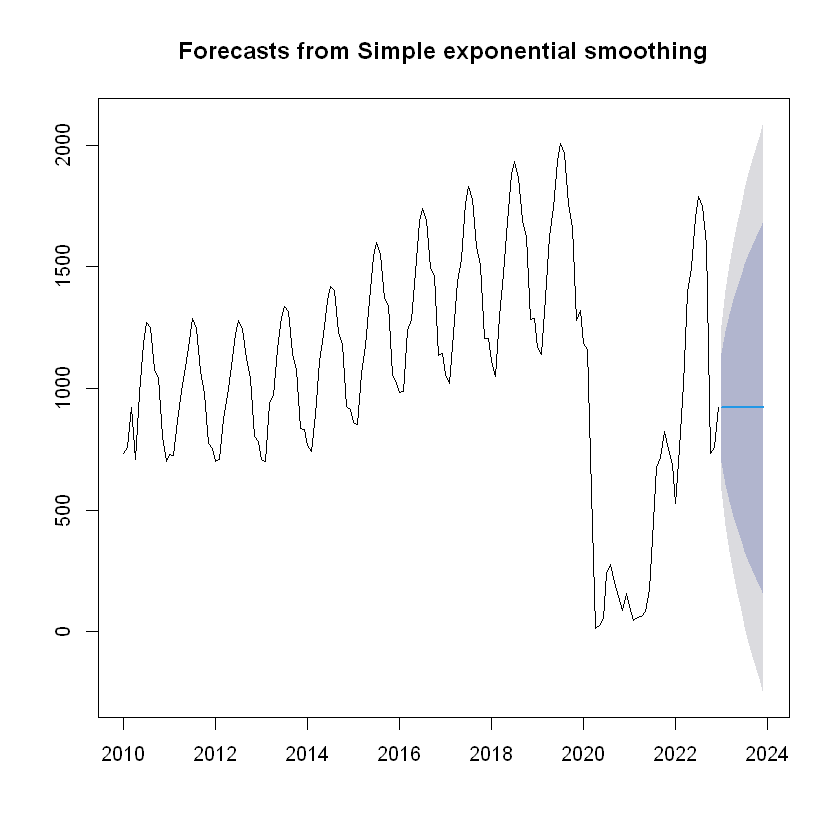

In [80]:
plot(se_model)

In [81]:
holt_model <- holt(dat_ts, h = 12)
summary(holt_model)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = dat_ts, h = 12) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.5723 

  Initial states:
    l = 685.5744 
    b = 45.9132 

  sigma:  177.2245

     AIC     AICc      BIC 
2409.080 2409.480 2424.329 

Error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set -0.479112 174.9376 131.3095 5.989298 41.27678 0.4839813 0.01515054

Forecasts:
         Point Forecast       Lo 80    Hi 80       Lo 95    Hi 95
Jan 2023       922.6984   695.57611 1149.821   575.34481 1270.052
Feb 2023       925.8342   502.63417 1349.034   278.60561 1573.063
Mar 2023       928.9699   283.72055 1574.219   -57.85384 1915.794
Apr 2023       932.1057    39.28688 1824.925  -433.34285 2297.554
May 2023       935.2414  -228.90183 2099.385  -845.16206 2715.645
Jun 2023       938.3772  -519.17366 2395.928 -1290.75448 3167.509
Jul 2023       941.5129  -830.09524 2713.121 -1767.9

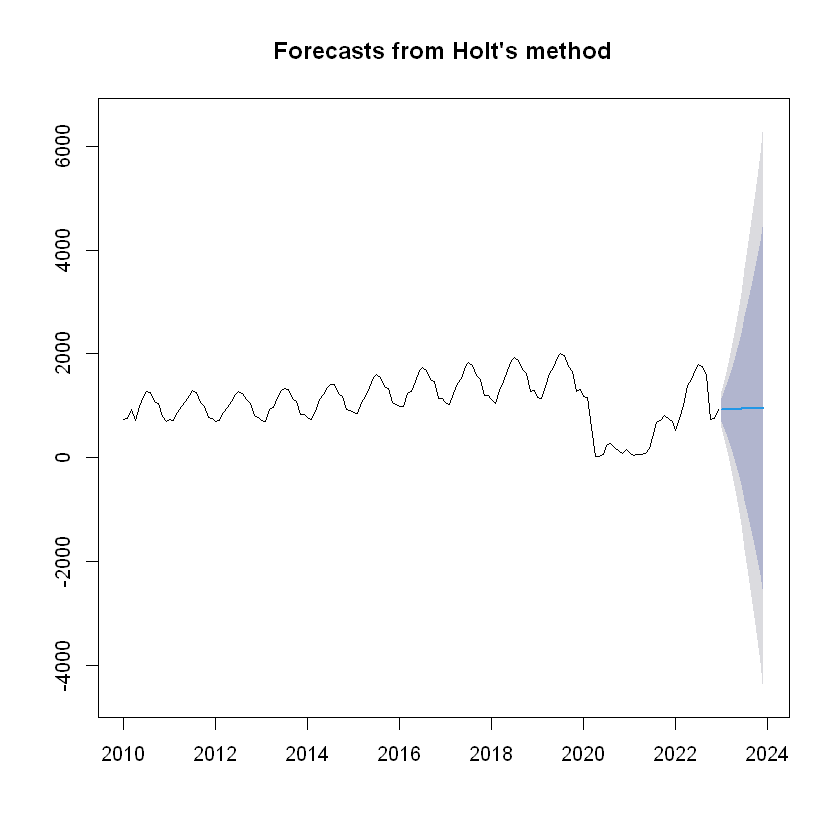

In [82]:
plot(holt_model)

In [83]:
df_holt = as.data.frame(holt_model)
#dat$holt = 
mape(dat$departure, df_holt$`Point Forecast`) 

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


[1] 172.4925

In [84]:
arima_model <- auto.arima(dat_ts)
summary(arima_model)

Series: dat_ts 
ARIMA(2,0,0)(2,1,0)[12] 

Coefficients:
         ar1      ar2     sar1     sar2
      1.2607  -0.3219  -0.6186  -0.4416
s.e.  0.0831   0.0831   0.1046   0.1052

sigma^2 = 18924:  log likelihood = -916.3
AIC=1842.6   AICc=1843.03   BIC=1857.45

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -1.175783 130.3193 62.05267 -32.17348 44.14329 0.2287141
                   ACF1
Training set -0.0144521

In [85]:
fore_arima = forecast::forecast(arima_model, h=12)
df_arima = as.data.frame(fore_arima)
mape(dat$departure, df_arima$`Point Forecast`)  

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


[1] 143.1578

In [86]:
fore_arima

         Point Forecast       Lo 80    Hi 80      Lo 95    Hi 95
Jan 2023       836.3163 660.0200692 1012.613  566.69446 1105.938
Feb 2023       911.2984 627.6066915 1194.990  477.42937 1345.167
Mar 2023       751.2908 390.1529734 1112.429  198.97817 1303.603
Apr 2023       641.4212 223.5634955 1059.279    2.36299 1280.479
May 2023       682.0680 221.7575861 1142.378  -21.91601 1386.052
Jun 2023       781.3505 288.6226910 1274.078   27.78833 1534.913
Jul 2023       925.3994 407.5129566 1443.286  133.36042 1717.438
Aug 2023       971.3668 433.7106734 1509.023  149.09272 1793.641
Sep 2023       881.2716 327.9338760 1434.609   35.01456 1727.529
Oct 2023       540.0137 -25.8514853 1105.879 -325.40242 1405.430
Nov 2023       506.0250 -69.9018188 1081.952 -374.77908 1386.829
Dec 2023       583.9274  -0.1140448 1167.969 -309.28693 1477.142

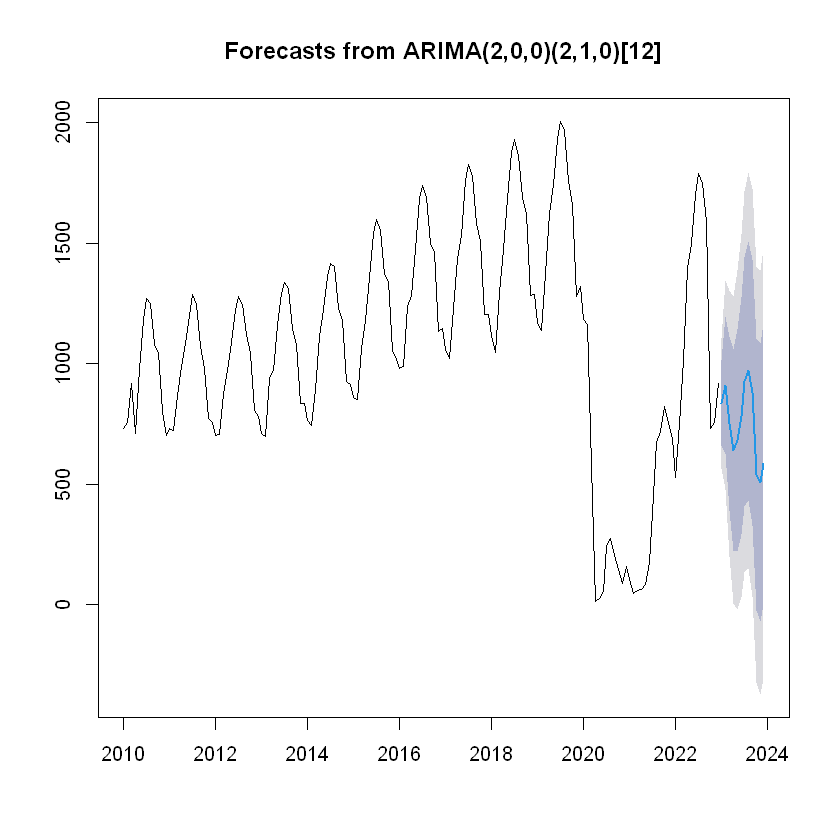

In [87]:
plot(fore_arima)

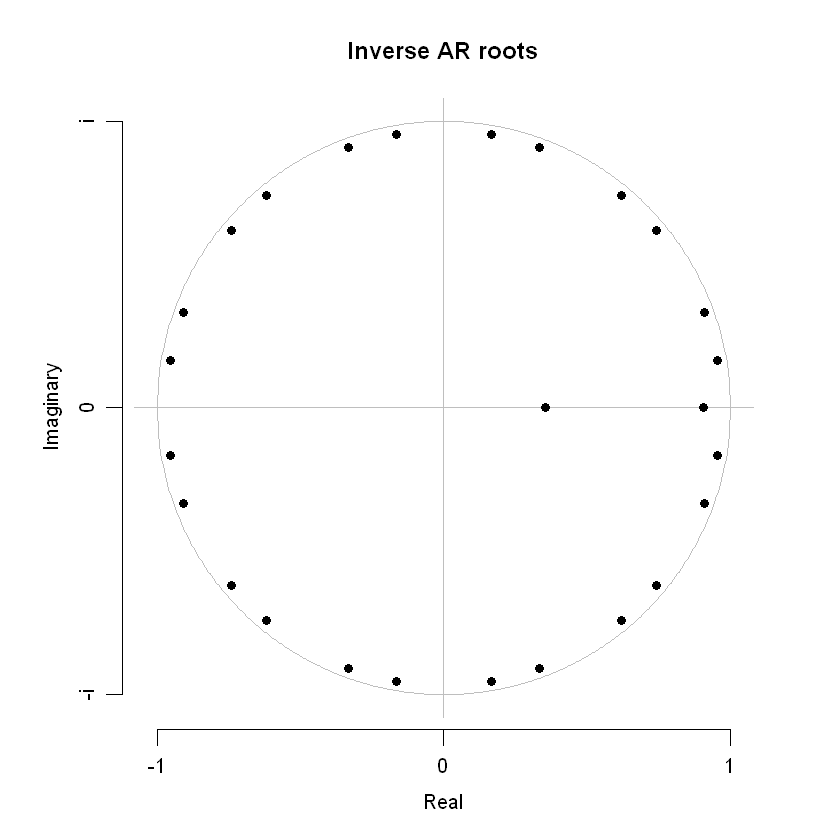

In [58]:
plot(arima_model)

In [37]:
model_tbats <- tbats(dat_ts)
summary(model_tbats)

                  Length Class  Mode     
lambda               0   -none- NULL     
alpha                1   -none- numeric  
beta                 1   -none- numeric  
damping.parameter    1   -none- numeric  
gamma.one.values     1   -none- numeric  
gamma.two.values     1   -none- numeric  
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states         12   -none- numeric  
fitted.values      156   ts     numeric  
errors             156   ts     numeric  
x                 1872   -none- numeric  
seasonal.periods     1   -none- numeric  
k.vector             1   -none- numeric  
y                  156   ts     numeric  
p                    1   -none- numeric  
q                    1   -none- numeric  
call                 2   -none- ca

In [38]:
for_tbats <- forecast::forecast(model_tbats, h = 12)
df_tbats = as.data.frame(for_tbats)
mape(dat$departure, df_tbats$`Point Forecast`) 

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


[1] 213.8431

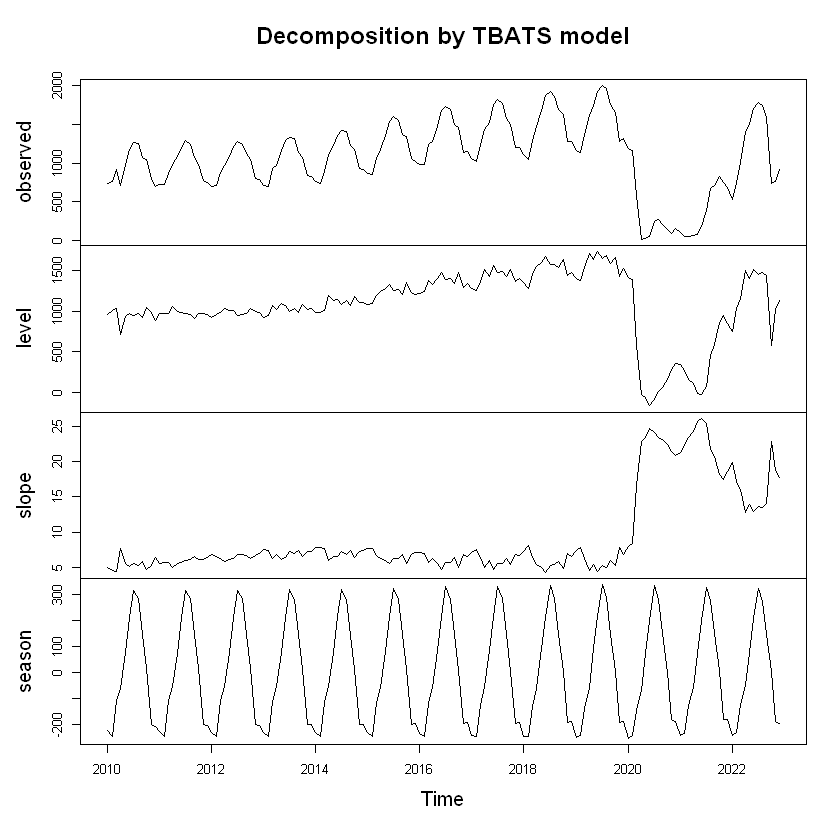

In [59]:
plot(model_tbats)

In [97]:
dat <- read_csv("Departure.csv")
glimpse(dat)

Rows: 153 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
dbl (1): departures '000

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 153
Columns: 2
$ Month             <chr> "2010 January", "2010 February", "2010 March", "2010…
$ `departures '000` <dbl> 732.4, 757.2, 919.6, 709.5, 977.9, 1183.1, 1269.5, 1…


In [98]:
dat_ss<-dat %>% filter(substr(dat$Month,1,4) <= '2020')

In [99]:
summary(dat_ss)

    Month           departures '000 
 Length:132         Min.   :  12.8  
 Class :character   1st Qu.: 888.1  
 Mode  :character   Median :1161.0  
                    Mean   :1136.2  
                    3rd Qu.:1370.5  
                    Max.   :2006.9  

In [100]:
str(dat_ss)

spc_tbl_ [132 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Month          : chr [1:132] "2010 January" "2010 February" "2010 March" "2010 April" ...
 $ departures '000: num [1:132] 732 757 920 710 978 ...
 - attr(*, "spec")=
  .. cols(
  ..   Month = col_character(),
  ..   `departures '000` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [101]:
head(dat_ss)

Month,departures '000
<chr>,<dbl>
2010 January,732.4
2010 February,757.2
2010 March,919.6
2010 April,709.5
2010 May,977.9
2010 June,1183.1


In [102]:
tail(dat_ss)

Month,departures '000
<chr>,<dbl>
2020 July,239.0
2020 August,275.5
2020 September,203.5
2020 October,143.7
2020 November,85.1
2020 December,156.1


In [103]:
nrow(dat_ss)

[1] 132

In [104]:
colnames(dat_ss)[2]='departure'

In [105]:
#dprt_dub$year <- substr(dprt_dub$Month,1,4)
dat_ss$Date <- trimws(paste(substr(dat_ss$Month,1,4),ifelse(
nchar(match(substr(dat_ss$Month,6,15), month.name))<2,
paste('0',match(substr(dat_ss$Month,6,15), month.name),sep=''),
match(substr(dat_ss$Month,6,15), month.name)
)
,sep=""))

In [106]:
dat_ss <- dat_ss[,!names(dat_ss) %in% c("Month")]

In [107]:
dat_ss$Date<-as.Date(paste0(dat_ss$Date, '01'), format='%Y%m%d')

In [108]:
dat_ss_ts <- ts(dat_ss[, 1], start = c(2010, 1), end = c(2020, 12), frequency = 12)

In [109]:
dat_ss_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


In [110]:
arima_model_ss <- auto.arima(dat_ss_ts)
summary(arima_model)

Series: dat_ts 
ARIMA(2,0,0)(2,1,0)[12] 

Coefficients:
         ar1      ar2     sar1     sar2
      1.2607  -0.3219  -0.6186  -0.4416
s.e.  0.0831   0.0831   0.1046   0.1052

sigma^2 = 18924:  log likelihood = -916.3
AIC=1842.6   AICc=1843.03   BIC=1857.45

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -1.175783 130.3193 62.05267 -32.17348 44.14329 0.2287141
                   ACF1
Training set -0.0144521

In [111]:
fore_arima_2020 = forecast::forecast(arima_model_ss, h=6)
df_arima_2020 = as.data.frame(fore_arima_2020)
mape(dat_ss$departure, df_arima_2020$`Point Forecast`)  

[1] 104.6038

In [112]:
fore_arima_2020

         Point Forecast      Lo 80    Hi 80     Lo 95     Hi 95
Jan 2021      104.45102  -32.29760 241.1996 -104.6879  313.5900
Feb 2021       94.42005 -140.31922 329.1593 -264.5827  453.4228
Mar 2021      168.66260 -147.82510 485.1503 -315.3636  652.6888
Apr 2021      181.99907 -203.89695 567.8951 -408.1780  772.1761
May 2021      312.76658 -133.51837 759.0515 -369.7673  995.3005
Jun 2021      466.67672  -33.35045 966.7039 -298.0488 1231.4023

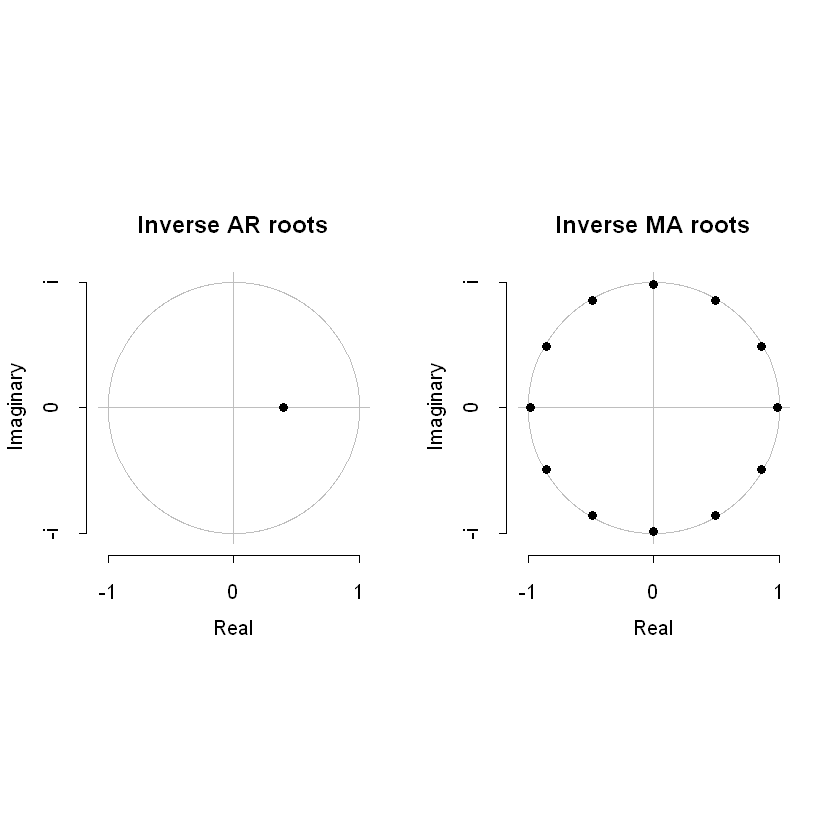

In [113]:
plot(arima_model_ss)

In [114]:
#Simple Exponential Smoothing

se_model_ss <- ses(dat_ss_ts, h = 6)
summary(se_model_ss)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = dat_ss_ts, h = 6) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 762.1407 

  sigma:  160.168

     AIC     AICc      BIC 
1988.638 1988.825 1997.286 

Error measures:
                    ME   RMSE      MAE       MPE     MAPE      MASE    ACF1
Training set -4.591731 158.95 121.0752 -33.82374 46.29513 0.6276607 0.42505

Forecasts:
         Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
Jan 2021       156.0929  -49.17071 361.3565 -157.8307 470.0165
Feb 2021       156.0929 -134.17916 446.3650 -287.8399 600.0257
Mar 2021       156.0929 -199.41038 511.5962 -387.6025 699.7882
Apr 2021       156.0929 -254.40351 566.5893 -471.7072 783.8930
May 2021       156.0929 -302.85374 615.0395 -545.8054 857.9912
Jun 2021       156.0929 -346.65628 658.8421 -612.7956 924.9814